<a href="https://colab.research.google.com/github/Eliane-orlandin/PrograMaria/blob/main/aulas/analise_dados_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Este projeto tem como objetivo explorar e analisar um conjunto de dados que abrange diversas variáveis relacionadas a aspectos sociais, profissionais e demográficos de indivíduos. Utilizando a biblioteca Python Pandas, foi possível manipular o dataset para realizar análises estatísticas e criar novas variáveis através de técnicas de *feature engineering*.

Ao longo do notebook, diferentes abordagens foram adotadas, incluindo:
- Estatísticas descritivas para entender as características principais dos dados.
- Identificação e tratamento de valores discrepantes (*outliers*) para garantir maior precisão nas análises.
- Construção de novas variáveis para facilitar interpretações e responder a perguntas específicas.
- Análise de correlação para identificar relações entre variáveis categóricas e numéricas.

Por meio dessas análises, o projeto busca obter informações úteis que podem embasar decisões estratégicas e promover um melhor entendimento do contexto em questão. Além disso, ele demonstra o uso prático de ferramentas poderosas para manipulação de dados e geração de insights valiosos.




# Importações

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
import seaborn as sns


# Uso de biblioteca Pandas

In [3]:
# Criar a variável, atribuir a leitura da planilha que está no google drive
dados = pd.read_excel('/content/drive/MyDrive/ProgaMaria/planilha_modulo3.xlsx')

In [4]:
# Exibe as primeiras e últimas linhas da planilha com todas as colunas, é um "resumo da planilha"
dados

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0


In [5]:
# Mostra as primeiras 5 linhas, se quiser pode colocar a quantidade de linhas dentro do ()
dados.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0


In [6]:
# Exibe as últimas 5 linhas, se quiser pode colocar a quantidade de linhas dentro do ()
dados.tail()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,True,...,Agronegócios,de 501 a 1.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


In [7]:
# Exibe a quantidade de linhas e colunas da tabela
dados.shape

(4271, 28)

In [8]:
# A função len (built-in) retorna o número de elementos da tabela
len(dados)

4271

In [9]:
# Exibe o nome das colunas da tabela
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [10]:
# Exibe o resumo do dataframe, fornecendo informações como: número de entradas (linhas) e colunas, nome das colunas, tipo de dado de cada coluna, número de valores nulos e o uso de memória.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [11]:
# Exibe estatísticas descritivas, útil para entender a distribuição dos dados e identificar tendências gerais
dados.describe()

,Unnamed: 0,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4271.000000,4197.000000,4171.000000,3694.000000,3694.000000
mean,2135.000000,31.169168,0.806281,0.193016,10969.266919
std,1233.075829,6.902803,0.395258,0.394719,19419.753189
min,0.000000,18.000000,0.000000,0.000000,35.000000
25%,1067.500000,26.000000,1.000000,0.000000,4269.500000
50%,2135.000000,30.000000,1.000000,0.000000,7625.500000
75%,3202.500000,35.000000,1.000000,0.000000,12778.500000
max,4270.000000,54.000000,1.000000,1.000000,485191.000000


# Repetindo análise do excel


In [12]:
# Este código filtra o DataFrame "dados" para retornar apenas as linhas onde a coluna "GENERO" possui o valor "Feminino".
dados[dados['GENERO'] == 'Feminino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [13]:
# Este código filtra o DataFrame "dados" para retornar apenas as linhas onde a coluna "GENERO" possui o valor "Masculino".
dados[dados['GENERO'] != 'Masculino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [14]:
# Filtra a coluna "GENERO" para verificar se contém "não", ignorando valores ausentes (NaN) com na=False.
dados[dados['GENERO'].str.contains('não', na=False)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


In [15]:
# Filtra a coluna "IDADE" os valores maiores de 30.
dados[dados['IDADE'] > 30]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,62001.0
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0


In [16]:
#Filtra dentro da coluna "IDADE" os maiores de 30 & dentre eles quais são de valor "Feminino"
dados[(dados['IDADE'] > 30) & (dados['GENERO'] == 'Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
23,23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,de 5 a 6 anos,13418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,4214,0gprow0ownrbfneftxf0gprow4kyrqdy,41.0,40-44,Feminino,Branca,Prefiro não informar,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Seguros ou Previdência,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,11452.0
4221,4221,0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d,34.0,30-34,Feminino,Outra,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5687.0
4240,4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Menos de 1 ano,1182.0
4247,4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor de Energia,de 11 a 50,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,5925.0


In [17]:
# Exibe coluna "COR/RACA/ETNIA"
dados['COR/RACA/ETNIA']


,COR/RACA/ETNIA
0,Parda
1,Parda
2,Branca
3,Branca
4,Branca
...,...
4266,Branca
4267,Branca
4268,Branca
4269,Branca


In [18]:
# Filtra a coluna "COR/RACA/ETNIA" e retorna o valor "Amarela"
dados[dados['COR/RACA/ETNIA'] == 'Amarela']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,zbukfwxvpwlk6loglm0zbukfwx6bvyb6,40.0,40-44,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Mais de 10 anos,11388.0
107,107,z9toybzbja7n6xjjbz9f8hmofrry69tg,44.0,40-44,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Indústria,Acima de 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,Mais de 10 anos,14500.0
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0
4210,4210,0hbwm1d1wz739r40hbwm1df6ky5kn4ap,43.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Sênior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Mais de 10 anos,7131.0
4257,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,62001.0


In [19]:
# Filtra a coluna "IDADE" os valores menores de 40
dados[dados['IDADE']<40]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
6,6,zytlxsdgalh22cgrijvzytlxa49i8yzx,21.0,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,4491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,4265,01nmlhyw8w2b4stchg01nmlvlcqp0iis,28.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Marketing,de 1 a 5,0.0,NaN,Analista de Marketing,Pleno,de R$ 2.001/mês a R$ 3.000/mês,de 3 a 4 anos,de 1 a 2 anos,2348.0
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0


In [20]:
#Filtra dentro da coluna "IDADE" os menores de 40 & dentre eles quais são de valor "Amarela"
dados[(dados['IDADE']<40) & (dados['COR/RACA/ETNIA'] == 'Amarela')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
170,170,yri3z491ejizlpj9ylu2k3jyri3z4915,34.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,16650.0
195,195,yjbpxmkqz5yidh5oszyjbpxmkgcb1zd9,32.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,3947,2tnsh0gxdu3aq4z2d2tnsh0hk15brx7q,31.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,False,...,Tecnologia/Fábrica de Software,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 25.001/mês a R$ 30.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,29408.0
4058,4058,1t3ndwx8j50k0bz1t3ndwxdpwyg17c2k,27.0,25-29,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Nível de cobrança no trabalho / Stress no trab...,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,14175.0
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0


In [21]:
# Agrupa por 'GENERO' e conta valores únicos na coluna 'ID', excluindo nulos por padrão.
dados.groupby('GENERO')['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12


In [22]:
# O parâmetro 'dropna' por padrão é 'True', então temos que mudar pra 'False', pra vir os nulos também
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [23]:
# Outra forma usando a função 'value_counts()'
dados['GENERO'].value_counts(dropna=False)

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12
NaN,9


In [24]:
# Filtro pra saber a quantidade de pessoas maiores que 30 anos e o nível
dados[dados['IDADE']>30]['NIVEL'].value_counts(dropna=False)

,count
NIVEL,
NaN,749
Sênior,525
Pleno,408
Júnior,274


In [25]:
# Filtro pra saber a quantidade de pessoas maiores que 30 anos com valor "Feminino" e o "nível"
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]['NIVEL'].value_counts(dropna=False)

,count
NIVEL,
NaN,176
Pleno,117
Sênior,114
Júnior,96


In [26]:
# Agrupa por 'GENERO' e conta valores únicos na coluna 'ID', excluindo nulos por padrão.
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count')

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

# Estatística básica

In [27]:
# Cria uma lista e atribui na variável "lista_idades"
lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23]

In [28]:
# Calcula a soma de todos os valores na lista "lista_idades", retornando o total acumulado.
np.sum(lista_idades)
print(f"Soma: {np.sum(lista_idades)}")

Soma: 328


In [29]:
# A função 'len' exibe a quatidade de itens dentro da lista
len(lista_idades)
print(f"Quantidade de itens: {len(lista_idades)}")

Quantidade de itens: 11


In [30]:
# Calcula a média de valores dentro da lista
np.sum(lista_idades)/11
print(f"Média: {np.sum(lista_idades)/len(lista_idades)}")

Média: 29.818181818181817


In [31]:
# Usa a função 'mean' que calcula a média e atribui a variável 'media'
media = np.mean(lista_idades)

In [32]:
media

np.float64(29.818181818181817)

In [33]:
print(f"Média aritmética: {media}")

Média aritmética: 29.818181818181817


A **média** pode ser menos eficaz em situações onde há valores extremos, conhecidos como **outliers**. Isso acontece porque a média é calculada somando todos os valores e dividindo pelo total, o que faz com que valores muito altos ou baixos distorçam o resultado e não representem adequadamente o conjunto de dados.

Ex: lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23, 100] # média 35.6

Já a **mediana** é o ** valor central** dos dados ordenados e é menos afetada por valores extremos. Por isso, ela é mais eficaz quando os dados têm uma distribuição não uniforme ou apresentam outliers. A mediana reflete melhor o ponto médio dos dados nesses casos, garantindo que a análise seja mais representativa.

Ex: lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23, 100] #média

In [34]:
# O método ".sort" ordena os elementos de uma lista
lista_idades.sort()
print(f"Lista ordenada: {lista_idades}")

Lista ordenada: [20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]


In [35]:
# Cria uma lista com um valor discrepante e atribui em uma nova variável
lista_idades2 = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23, 100]

In [36]:
# Calcula a média da variável
np.mean(lista_idades2)
print(f"Média: {np.mean(lista_idades2)}")


Média: 35.666666666666664


In [37]:
# Ordena a lista
lista_idades2.sort()
print(f"Lista ordenada: {lista_idades2}")

Lista ordenada: [20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43, 100]


In [38]:
mediana = np.median(lista_idades2)
print(f"Mediana: {mediana}")

Mediana: 30.5


#### Voltando para a tabela

In [39]:
# Calcula a média dos valores da coluna 'IDADE'
dados['IDADE'].mean()

np.float64(31.169168453657374)

In [40]:
# Calcula a mediana dos valores da coluna 'IDADE'
dados['IDADE'].median()

30.0

In [41]:
# Calcula a moda dos valores da coluna 'IDADE'
dados['IDADE'].mode()

,IDADE
0,27.0


In [42]:
# Calcula o desvio padrão dos valores da coluna 'IDADE'
dados['IDADE'].std()

6.902802832143141

In [43]:
# Filtra o menor valor da coluna 'IDADE'
dados['IDADE'].min()

18.0

In [44]:
# Filtra o maior valor da coluna 'IDADE'
dados['IDADE'].max()

54.0

In [45]:
# Filtrar da coluna 'Genero', com valor 'feminino' e calcula a média
media_feminino = dados[dados['GENERO'] == 'Feminino']['IDADE'].mean()
print("Média de idade do genero feminino: ", media_feminino)

Média de idade do genero feminino:  31.318051575931232


In [46]:
# Filtrar da coluna 'Genero', com valor 'masculino' e calcula a média
media_masculino = dados[dados['GENERO'] == 'Masculino']['IDADE'].mean()
print("Média de idade do genero masculino: ",media_masculino)

Média de idade do genero masculino:  31.147876077930373


In [47]:
# Exibe o tipo de dado da coluna 'FAIXA SALARIAL'
tipo = dados['FAIXA SALARIAL'].dtypes
print(f"O tipo de dado da coluna 'FAIXA SALARIAL' é: {tipo}")

O tipo de dado da coluna 'FAIXA SALARIAL' é: object


o tipo de dado object é usado para armazenar valores que não se enquadram em tipos numéricos ou categóricos específicos. Geralmente, ele é associado a strings (textos), mas também pode conter outros tipos de dados, como listas ou objetos Python.

In [48]:
# Retorna o tipo de dado do primeiro elemento da coluna
type(dados['FAIXA SALARIAL'][0])
print(f"O tipo de dado do primeiro elemento da coluna 'FAIXA SALARIAL' é: {type(dados['FAIXA SALARIAL'][0])}")


O tipo de dado do primeiro elemento da coluna 'FAIXA SALARIAL' é: <class 'str'>


In [49]:
# Agrupa os dados pela coluna 'FAIXA SALARIAL' e conta o número de valores únicos na coluna 'ID'.
# O parâmetro dropna=False inclui as linhas onde 'FAIXA SALARIAL' possui valores nulos (NaN) no agrupamento.
dados.groupby('FAIXA SALARIAL', dropna=False)['ID'].nunique()

,ID
FAIXA SALARIAL,
Acima de R$ 40.001/mês,45
Menos de R$ 1.000/mês,35
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 20.001/mês a R$ 25.000/mês,133
de R$ 25.001/mês a R$ 30.000/mês,77
de R$ 3.001/mês a R$ 4.000/mês,303


In [50]:
# Filtra da coluna 'Genero' os de valores 'Masculino' e calcula a média
media_salario_masculino = dados[dados['GENERO']=='Masculino']['SALARIO'].mean()
print("Média de salário do genero masculino: ", media_salario_masculino)

Média de salário do genero masculino:  11724.552688172043


In [51]:
# Filtra da coluna 'Genero' os de valores 'Feminino' e calcula a média
media_salario_feminino = dados[dados['GENERO']=='Feminino']['SALARIO'].mean()
print("Média de salário do genero feminino: ", media_salario_feminino)

Média de salário do genero feminino:  8673.22460496614


In [52]:
# Exibe valor máximo de salário
maior_salario = dados['SALARIO'].max()
print("Maior salário: ", maior_salario)

Maior salário:  485191.0


In [53]:
# Exibe valor mínimo de  salário
menor_salario = dados['SALARIO'].min()
print("Menor salário: ", menor_salario)

Menor salário:  35.0


In [54]:
# Calcula a média de salário
media_salario = dados['SALARIO'].mean()
print("Média de salário: ", media_salario)

Média de salário:  10969.26691932864


In [55]:
# Calcula a mediana de salário
mediana_salario = dados['SALARIO'].median()
print(f"Mediana de salário: {mediana_salario}")

Mediana de salário: 7625.5


In [56]:
# Calcula o desvio padrão
desvio_padrao = dados['SALARIO'].std()
print(f"Desvio padrão: {desvio_padrao}" )

Desvio padrão: 19419.753188763436


In [57]:
# Compara as médias salariais entre os gêneros feminino e masculino. Se a média salarial feminina for maior, exibe uma mensagem correspondente.
# Caso contrário, exibe que a média salarial masculina é maior.
if (media_salario_feminino > media_salario_masculino):
  print(f"Média de salário do gênero feminino é maior: R$ {media_salario_feminino}")
else:
  print(f"Média de salário do gênero masculino é maior: R$ {media_salario_masculino}")

Média de salário do gênero masculino é maior: R$ 11724.552688172043


# Valores faltantes

### Trabalhando a coluna 'gênero'


In [58]:
# Agrupa os dados na tabela pela coluna 'GENERO'.Conta quantos valores únicos existem na coluna 'ID' para cada grupo de gênero.
# Inclui valores nulos (NaN) no agrupamento devido ao parâmetro dropna=False.
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [59]:
# Substitui os valores nulos (NaN) na coluna 'GENERO' pelo texto 'Prefiro não informar'.
# Isso garante que valores ausentes sejam tratados, evitando problemas durante as análises.
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar')

In [60]:
# Verifica se os valores (NaN) foram substuídos pelo valor 'Prefiro não informar'
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


### Trabalhando coluna 'idade'

In [61]:
# Verifica a quantidade de valores 'nulo' na coluna idade.
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [62]:
# Verifica a coluna 'idade' quais são 'nulos' e desses 'nulos' filtra a coluna 'faixa de idade' pra ver se responderama faixa etária.
# Nesse caso não teve 'nulos'
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [63]:
# Filtra a coluna 'faixa idade' os valores que estão '17 - 21' e calcula a média
media_faixa_etaria = dados[dados['FAIXA IDADE'] == '17-21']['IDADE'].mean()
print(f"Média de idade entre 17 a 21 anos: {media_faixa_etaria:.2f}")

Média de idade entre 17 a 21 anos: 20.21


In [64]:
# Localiza as linhas onde 'FAIXA IDADE' é '17-21' e a coluna 'IDADE' possui valores nulos (NaN).
# Substitui esses valores nulos por 'media_faixa_etaria', que representa a média calculada para a faixa de idade '17-21'.
dados.loc[(dados['FAIXA IDADE']== '17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_faixa_etaria


In [65]:
# Verifica se os valores (NaN) foram substítuidos
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()


,count
FAIXA IDADE,
55+,68


In [66]:
# Filtra os valores na coluna "NIVEL", correspondentes às linhas onde a coluna "FAIXA IDADE" possui o valor "55+".
dados[dados['FAIXA IDADE']== '55+']['NIVEL']

,NIVEL
9,Pleno
66,Júnior
96,Pleno
121,Pleno
156,Júnior
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [67]:
# Calcula a média dos valores da coluna 'IDADE' e atribui seu valor em uma variável
media_geral = dados['IDADE'].mean()
media_geral

np.float64(31.153517220250375)

In [68]:
# Localiza as células de '55+' e 'nulas' e substitui os valores 'nulos' pela média geral
dados.loc[(dados['FAIXA IDADE']== '55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

### Tratando coluna 'salário'

In [69]:
# Filtrar da coluna salário quais celulas são 'nulas'
dados[dados['SALARIO'].isnull()]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Filtra da coluna salário quais valores são 'nulos' e dentre o que responderam a 'faixa salarial'. E Nesse caso tbm deixaram sem responder
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


In [71]:
# Calcula a mediana da coluna 'SALARIO' e atribui em uma variável
mediana_salario = dados['SALARIO'].median()

In [72]:
# Localiza dentro da coluna 'SALARIO' os valores nulos e substitui pela mediana
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

## Valores discrepantes (Outliers)

In [73]:
# Cria uma lista com valor discrepante
lista_idade = [26, 30, 32, 22, 26, 35, 400, 20, 43, 31, 23]

In [74]:
# Calcula a media da lista
media = np.mean(lista_idade)
print(f"Média: {media}")

Média: 62.54545454545455


In [75]:
# Calcula o desvio padrão da lista
desvio_padrao = np.std(lista_idade)
print(f"Desvio padrão: {desvio_padrao}")

Desvio padrão: 106.89532997398872


O desvio padrão de aproximadamente 106.89 significa que os valores na lista têm uma dispersão significativa em relação à média. Ou seja, os dados estão bastante espalhados, indicando que há grandes diferenças entre os valores.

Por exemplo, na lista (que contém o valor discrepante 400), o desvio padrão alto reflete como esse outlier influencia a variabilidade geral. Dados muito distantes da média, como 400, aumentam o desvio padrão, mostrando que a lista não está homogênea.

In [76]:
media + 3*desvio_padrao
print(f"Média + 3 desvio padrão: {media + 3*desvio_padrao}")

Média + 3 desvio padrão: 383.2314444674207


In [77]:
media - 3*desvio_padrao
print(f"Média - 3 desvio padrão: {media - 3*desvio_padrao}")

Média - 3 desvio padrão: -258.1405353765116


O cálculo "media + 3*desvio_padrao" determina o limite superior, enquanto "media - 3*desvio_padrao" determina o limite inferior em uma análise de dispersão de dados. Esses limites abrangem aproximadamente 99.7% dos dados em uma distribuição normal, ajudando a identificar outliers ou valores fora do padrão.


## Acompanhe os outliers da coluna salário

{'whiskers': [<matplotlib.lines.Line2D at 0x7adc252f9e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7adc252fb990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7adc250faa90>],
 'medians': [<matplotlib.lines.Line2D at 0x7adc252f8b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7adc252f3550>],
 'means': []}

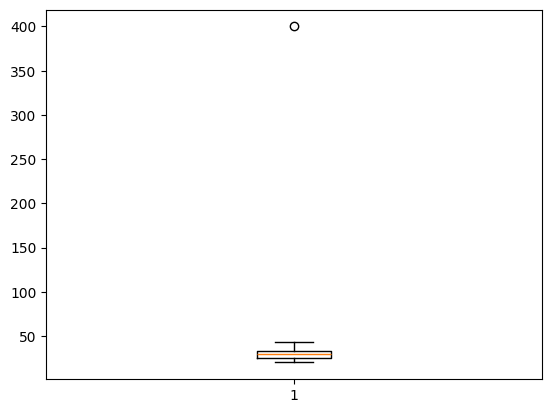

In [78]:
# Cria um gráfico de caixa (boxplot) para a lista "lista_idade" usando Matplotlib.
# O boxplot exibe a distribuição dos valores, destacando os quartis, a mediana e possíveis outliers.
plt.boxplot(lista_idade)

{'whiskers': [<matplotlib.lines.Line2D at 0x7adc25377450>,
 'caps': [<matplotlib.lines.Line2D at 0x7adc25368890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7adc25369bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7adc2541e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7adc2541db10>],
 'means': []}

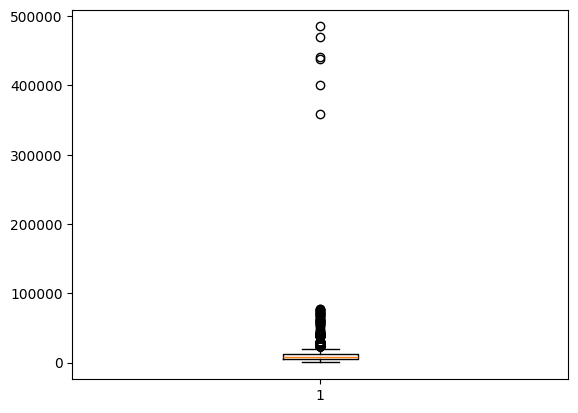

In [79]:
# Cria um gráfico de caixa (boxplot) para a couluna "SALARIO" usando Matplotlib.
# O boxplot exibe a distribuição dos valores, destacando os quartis, a mediana e possíveis outliers.
plt.boxplot(dados['SALARIO'])

## Aplique a regra dos quartis:

In [80]:
# Calcula o primeiro quartil da coluna 'SALARIO', que representam os 25% da distribuição dos dados.
Q1 = dados['SALARIO'].quantile(0.25)
print(f"O Primeiro quartil é: {Q1}")

O Primeiro quartil é: 4751.5


In [81]:
# Calcula o primeiro quartil da coluna 'SALARIO', que representam os 75% da distribuição dos dados.
Q3 = dados['SALARIO'].quantile(0.75)
print(f"O Terceiro quartil é: {Q3}")

O Terceiro quartil é: 11794.5


In [82]:
# Determina o intervalo interquartil (IQR), que é a diferença entre o terceiro e o primeiro quartil, usado para medir a dispersão dos valores.
IQR = Q3 - Q1
print(f"O intervalo interquartil é: {IQR}")

O intervalo interquartil é: 7043.0


## E os limites:
Valores fora desses limites podem ser considerados outliers.

In [83]:
# Calcula o limite superior para identificar possíveis outliers.
lim_superior = Q3 + (1.5*IQR)
print(f"O limite superior é: {lim_superior}")

O limite superior é: 22359.0


In [84]:
# Calcula o limite inferior para identificar possíveis outliers.
lim_inferior = Q1 - (1.5*IQR)
print(f"O limite inferior é: {lim_inferior}")

O limite inferior é: -5813.0


## Verifique a quantidade de pessoas por faixa salarial:

In [85]:
# Exibe a quantidade por categoria
dados['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


## Vamos calcular a média e o desvio padrão:


In [86]:
# Calculo de média e atribui em uma variável
media_salario = dados['SALARIO'].mean()
print(f"Média salário: R$ {media_salario}")

Média salário: R$ 10517.53348162023


In [87]:
# Calculo do desvio padrão e atribui em uma variável
desvio_salario = dados['SALARIO'].std()
print(f"Desvio padrão salário: R$ {desvio_salario}")


Desvio padrão salário: R$ 18096.210989118474


## Calcule o limite:

In [88]:
# Calcula o limite superior e atribui em uma variável
limite_superior = media_salario + (3*desvio_salario)
print(f"Limite superior: R$ {limite_superior}")

Limite superior: R$ 64806.16644897565


## Vamos verificar a faixa salarial:

In [89]:
# Filtra as linhas onde a coluna 'SALARIO' contém valores acima do limite superior (limite_superior).
# Em seguida, conta a quantidade de ocorrências de cada categoria na coluna 'FAIXA SALARIAL' para essas linhas.
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


## Vamos filtrar determinados médias salariais e desconsiderar os outliers

In [90]:
# Calcula a média dos salários na faixa salarial 'de R$ 30.001/mês a R$ 40.000/mês', excluindo valores acima do limite superior (outliers)
media_30_40 = dados[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO'] < limite_superior)]['SALARIO'].mean()
print(f"Média de salário entre R$ 30.001/mês a R$ 40.000/mês: R$ {media_30_40}")

Média de salário entre R$ 30.001/mês a R$ 40.000/mês: R$ 39002.19402985075


## Em seguida, localize os outliers:

In [91]:
# # Localiza as linhas onde a coluna 'FAIXA SALARIAL' tem o valor 'de R$ 30.001/mês a R$ 40.000/mês'e a coluna 'SALARIO' contém valores acima do limite
#superior (outliers). Substitui esses valores de 'SALARIO' pela média calculada para essa faixa salarial (media_30_40).
dados.loc[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO'] > limite_superior), 'SALARIO'] = media_30_40

## Confirme se deu certo:



In [92]:
# Verifique se houve as substituições
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


## Faça a média de salários acima de R$ 40.000:

In [93]:
# Calcula a média dos salários na faixa salarial 'Acima de R$ 40.001/mês', excluindo valores acima do limite superior (outliers).
media_acima_40 = dados[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO'] < limite_superior)]['SALARIO'].mean()
print(f"Média de salário acima de R$ 40.001/mês: R$ {media_acima_40}")

Média de salário acima de R$ 40.001/mês: R$ 53127.846153846156


In [94]:
# Localiza as linhas onde a coluna 'FAIXA SALARIAL' tem o valor 'Acima de R$ 40.001/mês' e a coluna 'SALARIO' contém valores acima do limite superior
# (outliers). Substitui esses valores de 'SALARIO' pela média calculada para essa faixa salarial (media_acima_40).
dados.loc[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO'] > limite_superior), 'SALARIO'] = media_acima_40

In [95]:
# Verifica se houve as substituições
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


## Verifique o resultado:

{'whiskers': [<matplotlib.lines.Line2D at 0x7adc25131510>,
 'caps': [<matplotlib.lines.Line2D at 0x7adc25133bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7adc25149110>],
 'medians': [<matplotlib.lines.Line2D at 0x7adc25132c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7adc25131310>],
 'means': []}

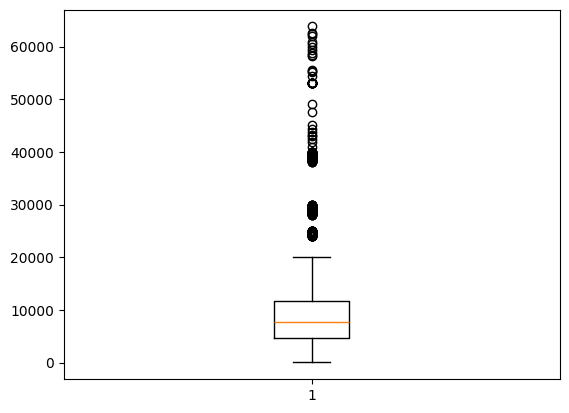

In [96]:
# Cria um gráfico de caixa (boxplot) para a coluna 'SALARIO' no DataFrame "dados" utilizando Matplotlib.
# O boxplot destaca a distribuição dos valores, incluindo os quartis, a mediana e os outliers, ajudando na visualização de padrões e valores discrepantes.
plt.boxplot(dados['SALARIO'])

# Distribuição amostral e intervalo de confiança

In [97]:
# Extrai os valores da coluna"SALARIO" e atribui em uma variável
salarios = dados['SALARIO']
salarios

,SALARIO
0,11194.0
1,4695.0
2,14202.0
3,15463.0
4,7733.0
...,...
4266,4329.0
4267,3758.0
4268,19607.0
4269,989.0


In [98]:
# Calcula a média e atribui em uma variável
media_amostral = np.mean(salarios)
print(f"Média amostral: R$ {media_amostral}")

Média amostral: R$ 9904.390109813306


In [99]:
# Calcula o desvio e atribui em uma variável
desvio_amostral = np.std(salarios)
print(f"Desvio padrão amostral: R$ {desvio_amostral}")

Desvio padrão amostral: R$ 8306.104872579343


In [100]:
# Defina o nível de confiança:
nivel_confianca = 0.95

In [101]:
# Acompanhe o tamanho da amostra:
tamanho_amostra = len(salarios)
print(f"Tamanho da amostra: {tamanho_amostra}")

Tamanho da amostra: 4271


In [102]:
# Calcule o erro padrão:
erro_padrao = stats.sem(salarios)
erro_padrao

np.float64(127.11109872023638)

In [103]:
# Calcule o intervalo de confiança:
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra -1, loc=media_amostral, scale=erro_padrao)
print(f"Intervalo de confiança: R$ {intervalo_confianca}")

Intervalo de confiança: R$ (np.float64(9655.186295869078), np.float64(10153.593923757535))


### Descobrir o intervalo de confiança entre 'idades' com o nível de confiança '0.90'

In [104]:
# Extrai os valores da coluna "IDADE" e atribui em uma variável
idades = dados['IDADE']
idades

,IDADE
0,39.000000
1,32.000000
2,53.000000
3,27.000000
4,46.000000
...,...
4266,26.000000
4267,30.000000
4268,29.000000
4269,20.205479


In [105]:
# Calcula a média e atribui em uma variável
idade_amostral2 = np.mean(idades)
print(f"Média amostral: {idade_amostral2}")

Média amostral: 31.153517220250375


In [106]:
# Calcula o desvio padrão e atribui em uma variável
desvio_amostral2 = np.std(idades)
print(f"Desvio padrão amostral: {desvio_amostral2}")

Desvio padrão amostral: 6.854238421066827


In [107]:
# Atribui a uma variável o nível de confiança
nivel_confianca = 0.90

In [108]:
# Exibe o tamanho de itens da tabela
tamanho_amostra = len(idades)
tamanho_amostra

4271

In [109]:
# Calcula o erro padrão das idades utilizando a função stats.sem() da biblioteca SciPy.
# O erro padrão mede a precisão da média amostral, indicando a variabilidade entre as amostras.
erro_padrao_idades = stats.sem(idades)
erro_padrao

np.float64(127.11109872023638)

In [110]:
# Calcula o intervalo de confiança para a média amostral das idades, considerando o nível de confiança especificado.
# Utiliza a função stats.t.interval da biblioteca SciPy, que calcula os limites inferior e superior do intervalo.
# loc=idade_amostral2 representa a média amostral das idades, enquanto scale=erro_padrao_idades é o erro padrão.
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra -1,
loc=idade_amostral2, scale=erro_padrao_idades)
intervalo_confianca

(np.float64(30.980946640614814), np.float64(31.326087799885936))

Exercício 2 -

In [111]:
# Agrupa os dados pelas colunas 'CARGO ATUAL' e 'GENERO', e calcula a média dos salários ('SALARIO') para cada combinação.
media_salarial = dados.groupby(['CARGO ATUAL', 'GENERO'])['SALARIO'].mean()
print(media_salarial)


CARGO ATUAL                                                          GENERO              
Analista de BI/BI Analyst                                            Feminino                 5545.216495
                                                                     Masculino                6579.539286
                                                                     Prefiro não informar     2104.000000
Analista de Dados/Data Analyst                                       Feminino                 7519.989418
                                                                     Masculino                7391.130045
                                                                     Prefiro não informar     6827.500000
Analista de Inteligência de Mercado/Market Intelligence              Feminino                 6938.166667
                                                                     Masculino                5309.217391
Analista de Marketing                                         

In [112]:
# Filtra da coluna 'GENERO' os valores que 'Prefiro não informar' e faz a soma da quantidade de teve aquela resposta.
quantidade = dados[dados['GENERO'] == 'Prefiro não informar']['ID'].nunique()
print(f"Quantidade de pessoas que preferem não informar: {quantidade}")


Quantidade de pessoas que preferem não informar: 21


In [113]:
len(dados)

4271

In [114]:
# Inicializa um dicionário para armazenar os intervalos de confiança
# Itera sobre os dados agrupados por 'CARGO ATUAL' e 'GENERO'
# Obtém a coluna 'SALARIO' para o grupo atual, ignorando valores nulos
# Calcula o tamanho da amostra (número de salários disponíveis)
# Calcula a média dos salários do grupo atual
# Calcula o erro padrão da média
# Define o nível de confiança desejado (90% neste caso)
# Calcula o intervalo de confiança usando a distribuição
# Armazena o intervalo de confiança no dicionário, com chave sendo (cargo, genero)

intervalo_confianca = {}

for (cargo, genero), grupo in dados.groupby(['CARGO ATUAL', 'GENERO']):
    salarios = grupo['SALARIO'].dropna()
    tamanho = len(salarios)
    media = salarios.mean()
    erro_padrao = stats.sem(salarios)
    nivel_confianca = 0.90
    intervalo = stats.t.interval(nivel_confianca, tamanho-1, loc=media, scale=erro_padrao)
    intervalo_confianca[(cargo, genero)] = intervalo
    print(f"{cargo}, {genero}: {intervalo}")

Analista de BI/BI Analyst, Feminino: (np.float64(4924.272355537892), np.float64(6166.16063415283))
Analista de BI/BI Analyst, Masculino: (np.float64(6103.896611446916), np.float64(7055.181959981656))
Analista de BI/BI Analyst, Prefiro não informar: (np.float64(nan), np.float64(nan))
Analista de Dados/Data Analyst, Feminino: (np.float64(6822.310046854435), np.float64(8217.6687891244))
Analista de Dados/Data Analyst, Masculino: (np.float64(6957.922598732144), np.float64(7824.337490953954))
Analista de Dados/Data Analyst, Prefiro não informar: (np.float64(1020.4941006055087), np.float64(12634.505899394488))
Analista de Inteligência de Mercado/Market Intelligence, Feminino: (np.float64(4034.884279634212), np.float64(9841.449053699122))
Analista de Inteligência de Mercado/Market Intelligence, Masculino: (np.float64(4202.548915266554), np.float64(6415.885867342142))
Analista de Marketing, Feminino: (np.float64(3633.51161431867), np.float64(5230.488385681329))
Analista de Marketing, Masculino

<ipython-input-114-0140ddc307e9>:17: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  erro_padrao = stats.sem(salarios)


# Featuring engineering

In [115]:
# Função que avalia se uma pessoa é gestora com base no parâmetro "gestor". Se "gestor" for igual a 1, a função retorna "Pessoa gestora"; caso contrário,
# retorna o valor original do parâmetro "nivel", mantendo a descrição fornecida.
def preencher_nivel (gestor, nivel):
  if gestor==1:
    return 'Pessoa gestora'
  else:
    return nivel

In [116]:
# Aplicação da função "preencher_nivel" a cada linha do dataframe "dados".
# Para cada linha, verifica-se se a pessoa é gestora com base nos valores das colunas "GESTOR?" e "NIVEL".
# O resultado é uma nova coluna, "NOVO_NIVEL", que contém a descrição ajustada do nível de cada pessoa.
dados['NOVO_NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

In [117]:
dados['NOVO_NIVEL'].value_counts()

,count
NOVO_NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa gestora,713


In [118]:
# Transforma os dados da coluna "NOVO_NIVEL" em variáveis dummy, criando novas colunas no dataframe "dados" para cada categoria única presente
#"NOVO_NIVEL". Esse processo é usado para representar variáveis categóricas de forma numérica, facilitando análises estatísticas e modelagem preditiva.
dados = pd.get_dummies(dados, columns=['NOVO_NIVEL'])

In [119]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL_Júnior', 'NOVO_NIVEL_Pessoa gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior'],
      dtype='object')

In [120]:
# Função que determina a geração de uma pessoa com base em sua idade. As gerações são classificadas conforme os intervalos de idade:
# "Geração X" para idades entre 40 e 58 anos, "Millenial" para idades entre 30 e 39 anos, "Geração Z" para idades entre 14 e 29 anos, e
# "Outra geração" para idades fora desses intervalos.
def determinar_geracao(idade):
  if 39 < idade <= 58:
    return "Geração X"
  elif 29 < idade <= 39:
    return "Millenial"
  elif 13 < idade <= 29:
    return "Geração Z"
  else:
    return "Outra geração"

In [121]:
# Utiliza a função "determinar_geracao" para classificar a geração de cada indivíduo com base na idade presente na coluna "IDADE" do dataframe "dados".
# O resultado é armazenado na nova coluna "GERACAO", identificando a geração correspondente ("Geração X", "Millenial", "Geração Z" ou "Outra geração")
# para cada pessoa.
dados ['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [122]:
dados ['GERACAO'].value_counts()

,count
GERACAO,
Geração Z,1999
Millenial,1761
Geração X,511


### Aula parte 2

In [123]:
# Lê o arquivo Excel especificado e carrega os dados em um DataFrame.
dados2 = pd.read_excel('/content/drive/MyDrive/ProgaMaria/Planilha_Aula_parte2.xlsx')

In [124]:
# Exibe as primeiras 5 linhas do DataFrame 'dados2' para visualizar os dados carregados.
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [125]:
# Realiza um merge (junção) entre o DataFrame 'dados' e 'dados2' com base na coluna 'ID'. O parâmetro 'how="left"' assegura que todas as linhas de
# 'dados' serão mantidas, adicionando informações de 'dados2' onde houver correspondência.
dados = dados.merge(dados2, on="ID", how="left")

In [126]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL_Júnior', 'NOVO_NIVEL_Pessoa gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'GERACAO',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalh

In [127]:
# Conta a frequência de cada resposta na coluna 'Você pretende mudar de emprego nos próximos 6 meses?' do DataFrame 'dados'.
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [128]:
# Cria uma nova coluna 'EM_BUSCA' no DataFrame 'dados' com valores booleanos (True ou False). A coluna indica se a string 'em busca' está presente nas
# respostas da coluna 'Você pretende mudar de emprego nos próximos 6 meses?', ignorando diferenças de maiúsculas e minúsculas.
dados['EM_BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)

In [129]:
# Exibe a contagem de valores True e False na coluna 'EM_BUSCA', indicando o número de respostas que contêm a expressão 'em busca' e o número de
# respostas que não contêm.
dados['EM_BUSCA'].value_counts()

,count
EM_BUSCA,
False,2332
True,1364


In [130]:
# Cria a coluna 'ABERTO_OPORTUNIDADE' no DataFrame 'dados' com valores booleanos (True ou False). Identifica se a palavra 'aberto' aparece na
# coluna 'Você pretende mudar de emprego nos próximos 6 meses?', ignorando diferenças entre maiúsculas e minúsculas.
dados['ABERTO_OPORTUNIDADE'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

In [131]:
# Exibe a contagem de valores True e False na coluna 'ABERTO_OPORTUNIDADE',indicando quantas respostas contêm a palavra 'aberto' e quantas não contêm.
dados['ABERTO_OPORTUNIDADE'].value_counts()

,count
ABERTO_OPORTUNIDADE,
False,2342
True,1354


Criar uma nova coluna de etnia, simplificando com branco, não brancos e outros

In [132]:
# Exibe a contagem de ocorrências distintas na coluna 'COR/RACA/ETNIA', fornecendo um resumo da frequência de cada categoria presente nos dados.
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,2746
Parda,1054
Preta,291
Amarela,128
Prefiro não informar,26
Outra,17
Indígena,11


In [133]:
# Define todas as entradas da coluna 'ETNIA' como 'Outros', substituindo quaisquer valores existentes.
dados['ETNIA'] = 'Outros'

In [134]:
# Atualiza a coluna 'ETNIA' para 'Branco' nas linhas em que a coluna 'COR/RACA/ETNIA' possui o valor 'Branca'.
dados.loc[dados['COR/RACA/ETNIA'] == 'Branca', 'ETNIA'] = 'Branco'

In [135]:
# Atualiza a coluna 'ETNIA' para 'Não branco' nas linhas onde a coluna 'COR/RACA/ETNIA' contém valores 'Parda', 'Preta', 'Amarela' ou 'Indígena'.
dados.loc[dados['COR/RACA/ETNIA'].isin(['Parda', 'Preta', 'Amarela', 'Indígena']), 'ETNIA'] = 'Não branco'

In [136]:
# Exibe a contagem de valores distintos na coluna 'ETNIA', mostrando a frequência de cada categoria após as atualizações feitas nos dados.
dados['ETNIA'].value_counts()

,count
ETNIA,
Branco,2746
Não branco,1484
Outros,43


# Correlação

In [137]:
# Calcula a correlação entre as colunas 'IDADE' e 'SALARIO' do DataFrame 'dados', retornando um valor que indica a força e direção da relação entre
# essas variáveis.
correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
print(f"Correlação contínua: {correlacao_continua}")

Correlação contínua: 0.2902441968622099


In [138]:
# Importa a função 'chi2_contingency' do módulo 'scipy.stats'.
# Esta função é usada para realizar o teste qui-quadrado de independência em uma tabela de contingência. O teste avalia se existe uma relação
# estatisticamente significativa entre duas variáveis categóricas.

from scipy.stats import chi2_contingency

In [139]:
# Calcula o coeficiente V de Cramér entre duas variáveis categóricas.
# Esse coeficiente mede a associação entre as variáveis, baseado no qui-quadrado. O valor varia de 0 (nenhuma associação) a 1 (associação perfeita).
# Parâmetros: coluna1, coluna2: colunas categóricas (pandas Series).
# Retorna: O valor do coeficiente de Cramér (float).
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [140]:
# Calcula o coeficiente de Cramér para medir a associação entre as variáveis 'COR/RACA/ETNIA' e 'NIVEL DE ENSINO' do DataFrame 'dados'.
# O resultado indica a intensidade da relação entre essas duas variáveis categóricas.
cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])

np.float64(0.04499106580480143)

In [141]:
# Mede a associação entre as variáveis 'GENERO' e 'NIVEL DE ENSINO'usando o coeficiente de Cramér. O resultado indica o grau de relação
# entre o gênero dos indivíduos e o nível de ensino que alcançaram.
cramer_coeficiente(dados['GENERO'], dados['NIVEL DE ENSINO'])

np.float64(0.076119232802818)

In [142]:
# Cria uma tabela cruzada (tabela de contingência) entre as variáveis 'COR/RACA/ETNIA' e 'NIVEL DE ENSINO' do DataFrame 'dados'.
# A tabela mostra a frequência absoluta de cada combinação de categorias, permitindo analisar a distribuição conjunta dessas duas variáveis.
tabela_cruzada = pd.crosstab(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])
tabela_cruzada

NIVEL DE ENSINO,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Não tenho graduação formal,Prefiro não informar,Pós-graduação
COR/RACA/ETNIA,,,,,,,
Amarela,7,15,50,14,2,0,40
Branca,127,365,999,355,65,8,827
Indígena,0,2,4,2,0,0,3
Outra,0,0,6,3,1,0,7
Parda,50,178,333,113,33,3,344
Prefiro não informar,1,2,14,1,0,1,7
Preta,6,51,104,33,9,0,88


In [143]:
# Converte a tabela cruzada (DataFrame) em um array NumPy. Essa transformação é útil para realizar cálculos estatísticos,como o teste do qui-quadrado
# ou o coeficiente de Cramér.
np.array(tabela_cruzada)

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

In [144]:
# Exporta o DataFrame 'dados' para um arquivo CSV no Google Drive, no caminho especificado. O parâmetro index=False evita salvar o índice
# como uma coluna no arquivo.
dados.to_csv('/content/drive/MyDrive/ProgaMaria/analise_dados_tratados.csv', index=False )

# Conectando SQL com Pandas

In [145]:
# Cria uma conexão com o banco de dados SQLite localizado no caminho especificado
conexao = sqlite3.connect('/content/drive/MyDrive/ProgaMaria/status_brasil')

In [146]:
query = "SELECT * FROM Municipios_Brasileiros WHERE Cidade='Itaquaquecetuba';"

In [147]:
query

"SELECT * FROM Municipios_Brasileiros WHERE Cidade='Itaquaquecetuba';"

In [148]:
pd.read_sql(query, con=conexao)

,Cidade,Estado,Regiao,municipio_ID
0,Itaquaquecetuba,SP,Sudeste,5043


In [149]:
# Lê o arquivo CSV com os dados tratados e carrega em um DataFrame do pandas
dados3 = pd.read_csv('/content/drive/MyDrive/ProgaMaria/analise_dados_tratados.csv')

In [150]:
dados3.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL_Júnior', 'NOVO_NIVEL_Pessoa gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'GERACAO',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalh

In [151]:
dados3['UF ONDE MORA']

,UF ONDE MORA
0,DF
1,PA
2,DF
3,MG
4,PA
...,...
4268,SP
4269,MG
4270,SP
4271,SP


In [152]:
# Cria uma lista com os valores únicos da coluna 'UF ONDE MORA' (estados) do DataFrame
lista_estados = list(dados3['UF ONDE MORA'].unique())

In [153]:
# Monta a consulta SQL para obter a média de renda por estado apenas para os estados presentes em lista_estados,
# usando placeholders (?) para segurança (parametrização
query = '''SELECT Municipios_Brasileiros.Estado, AVG(Municipios_Status.renda)
FROM Municipios_Brasileiros INNER JOIN Municipios_Status ON
Municipios_Brasileiros.municipio_ID = Municipios_Status.municipio_ID
WHERE Municipios_Brasileiros.Estado IN ({})
GROUP BY Municipios_Brasileiros.Estado;'''.format(','.join(['?' for _ in lista_estados]))

In [154]:
# Executa a consulta SQL no banco de dados e carrega o resultado em um DataFrame do pandas
estados_renda = pd.read_sql(query, con=conexao, params=lista_estados)

In [155]:
# Renomeia a coluna 'UF ONDE MORA' para 'Estado' no DataFrame dados3
dados3.rename(columns={'UF ONDE MORA' : 'Estado'}, inplace=True)

In [156]:
# Faz um merge (junção) entre dados3 e estados_renda pela coluna 'Estado', mantendo todos os registros de dados3
# e adicionando a média de renda correspondente
dados3 = dados3.merge(estados_renda, on='Estado', how='left')

In [157]:
# Calcula a correlação entre as colunas 'SALARIO' e 'AVG(Municipios_Status.renda)' no DataFrame final
correlacao_renda_salario = dados3['SALARIO'].corr(dados3['AVG(Municipios_Status.renda)'])
correlacao_renda_salario

np.float64(0.12083384881429463)

### Exercício - Correlação entre educação e salário

In [158]:
salario_ensino = '''SELECT "NIVEL DE ENSINO", AVG(SALARIO) as media_salarial
FROM sua_tabela
WHERE "NIVEL DE ENSINO" IS NOT NULL AND SALARIO IS NOT NULL
GROUP BY "NIVEL DE ENSINO";'''

In [159]:
# Renomeia para evitar espaços no nome da coluna, se necessário
dados3.rename(columns={'NIVEL DE ENSINO': 'NivelEnsino'}, inplace=True)

In [160]:
# Cria uma tabela com média salarial por nível de ensino (usando pandas, se preferir não fazer no SQL)
media_por_ensino = dados3.groupby('NivelEnsino')['SALARIO'].mean().reset_index()

In [161]:
# Junta ao dataframe original
dados3 = dados3.merge(media_por_ensino, on='NivelEnsino', how='left')


In [162]:
# Calcula a correlação entre salário individual e média salarial do nível de ensino
correlacao_salario_ensino = dados3['SALARIO_x'].corr(dados3['SALARIO_y'])

In [163]:
print('Correlação entre salário individual e média salarial por nível de ensino:', correlacao_salario_ensino)

Correlação entre salário individual e média salarial por nível de ensino: 0.32000983705929376


# Visualização de dados

In [164]:
import pandas as pd

In [165]:
dados4 = pd.read_csv('/content/drive/MyDrive/ProgaMaria/analise_dados.csv', encoding="'utf-8'", sep="," )


In [166]:
dados4.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO,NOVA_ETNIA
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,Não branca
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,Não branca
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,Branca
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,Branca
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,Branca


In [167]:
genero_counts = dados4['GENERO'].value_counts()

In [168]:
import matplotlib.pyplot as plt


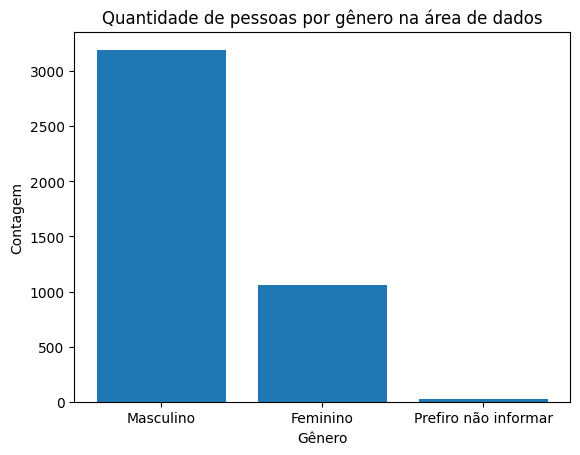

In [169]:
plt.figure()
plt.bar(height= genero_counts.values, x = genero_counts.index)
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

In [170]:
import seaborn as sns

<ipython-input-171-fcc15124a200>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados4, x='GENERO', palette = 'pastel')


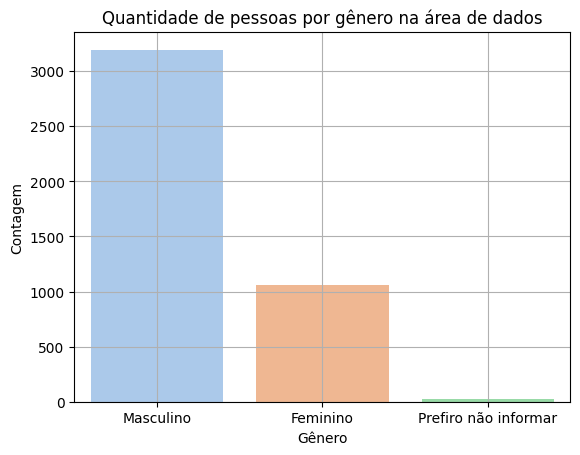

In [171]:
plt.figure()
sns.countplot(data=dados4, x='GENERO', palette = 'pastel')
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [172]:
salario_por_idade = dados4.groupby('IDADE')['SALARIO'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

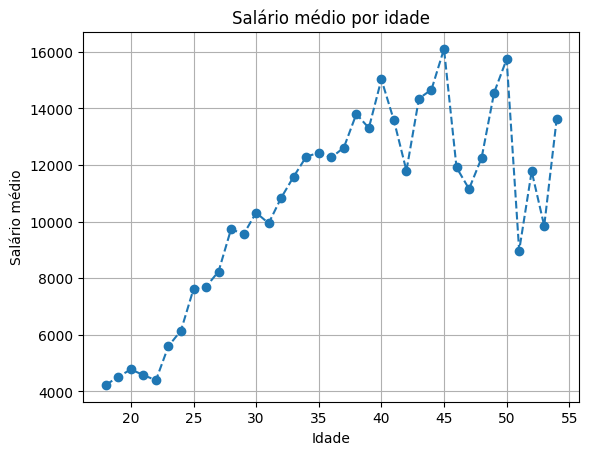

In [173]:
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker='o', linestyle='--')
plt.title('Salário médio por idade')
plt.xlabel('Idade')
plt.ylabel('Salário médio')
plt.grid(True)
plt.show

In [174]:
import plotly.express as px

In [175]:
fig = px.line(salario_por_idade.reset_index(), x='IDADE', y='SALARIO', title='Salário médio por idade', markers=True)
fig.show()

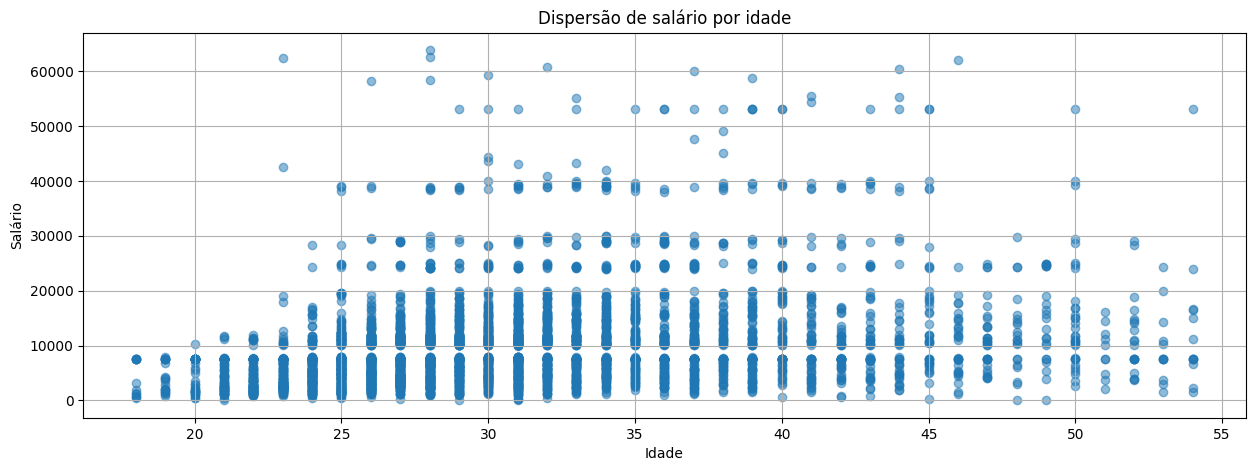

In [176]:
plt.figure(figsize=(15, 5))
plt.scatter(dados4['IDADE'], dados4['SALARIO'], alpha=0.5)
plt.title('Dispersão de salário por idade')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid(True)
plt.show()

In [177]:
fig = px.scatter(dados4, x='IDADE', y='SALARIO', title='Dispersão de salário por idade')
fig.show()

### Exercício

In [178]:
dados5 = pd.read_csv('/content/drive/MyDrive/ProgaMaria/municipios_brasileiros.csv')

In [179]:
dados5.columns

Index(['codigo_ibge', 'nome_municipio', 'codigo_uf', 'uf', 'estado', 'capital',
       'latitude', 'longitude'],
      dtype='object')

In [180]:
quantidade_por_estado = dados5.groupby('uf')['nome_municipio'].count()

In [181]:
quantidade_por_estado

,nome_municipio
uf,
AC,22
AL,102
AM,62
AP,16
BA,417
CE,184
DF,1
ES,78
GO,246


<ipython-input-183-3d0c7b2d0ab5>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-183-3d0c7b2d0ab5>:2: UserWarning:


The palette list has fewer values (6) than needed (27) and will cycle, which may produce an uninterpretable plot.



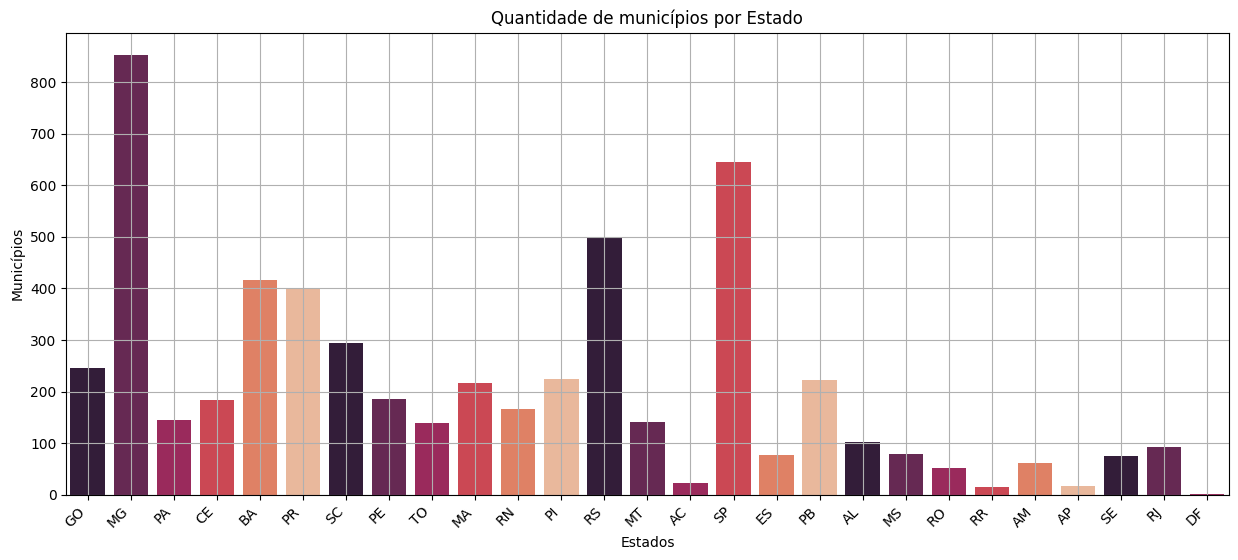

In [183]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dados5, x='uf', palette=sns.color_palette("rocket"))
plt.title('Quantidade de municípios por Estado')
plt.xlabel('Estados')
plt.ylabel('Municípios', rotation=90)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

<ipython-input-217-555f07b29efb>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




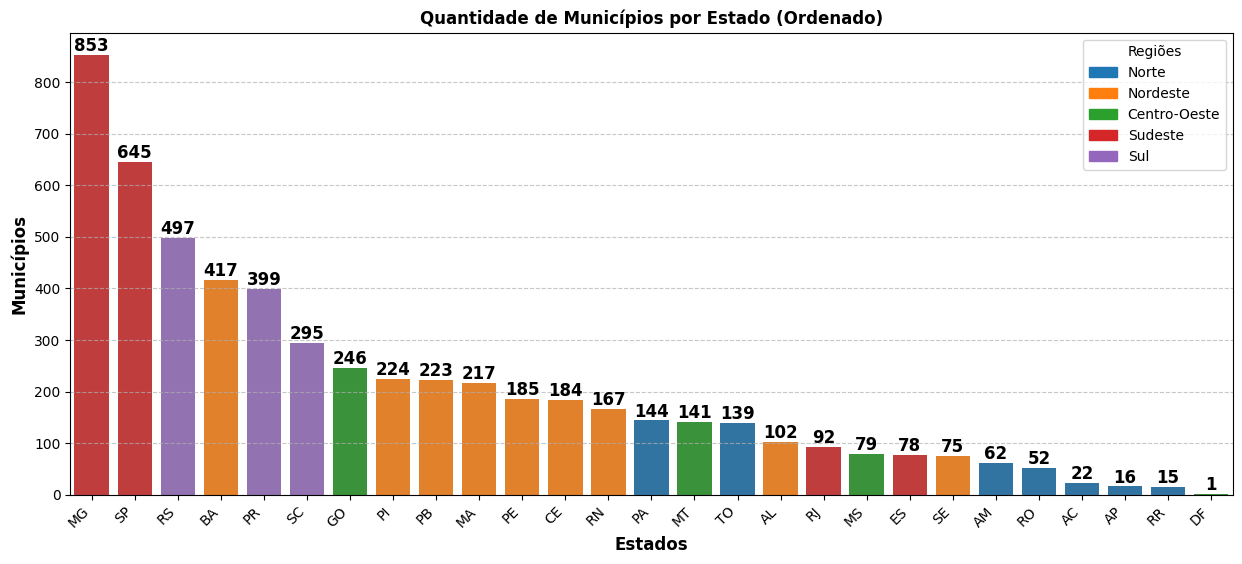

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento de cada UF (estado) para sua respectiva região
regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AM': 'Norte', 'AP': 'Norte', 'BA': 'Nordeste',
    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
    'MA': 'Nordeste', 'MG': 'Sudeste', 'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste',
    'PA': 'Norte', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'PR': 'Sul',
    'RJ': 'Sudeste', 'RN': 'Nordeste', 'RO': 'Norte', 'RR': 'Norte', 'RS': 'Sul',
    'SC': 'Sul', 'SE': 'Nordeste', 'SP': 'Sudeste', 'TO': 'Norte'
}

# Paleta de cores para cada região
cores_regiao = {
    'Norte': '#1f77b4',        # azul
    'Nordeste': '#ff7f0e',     # laranja
    'Centro-Oeste': '#2ca02c', # verde
    'Sudeste': '#d62728',      # vermelho
    'Sul': '#9467bd'           # roxo
}

# Criar paleta de cores baseada na região de cada UF
palette = [cores_regiao[regiao[uf]] for uf in quantidade_por_estado['uf']]

# Criar o gráfico
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=quantidade_por_estado, x='uf', y='nome_municipio', palette=palette)

# Adicionar os valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Adicionar legenda manualmente
handles = [plt.Rectangle((0,0),1,1, color=cores_regiao[regiao]) for regiao in cores_regiao]
plt.legend(handles, cores_regiao.keys(), title="Regiões", loc="upper right")

# Configurações do gráfico
plt.title('Quantidade de Municípios por Estado (Ordenado)', fontsize=12, fontweight='bold')
plt.xlabel('Estados', fontsize=12, fontweight='bold')
plt.ylabel('Municípios', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Adicionar **somente** linhas verticais na grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


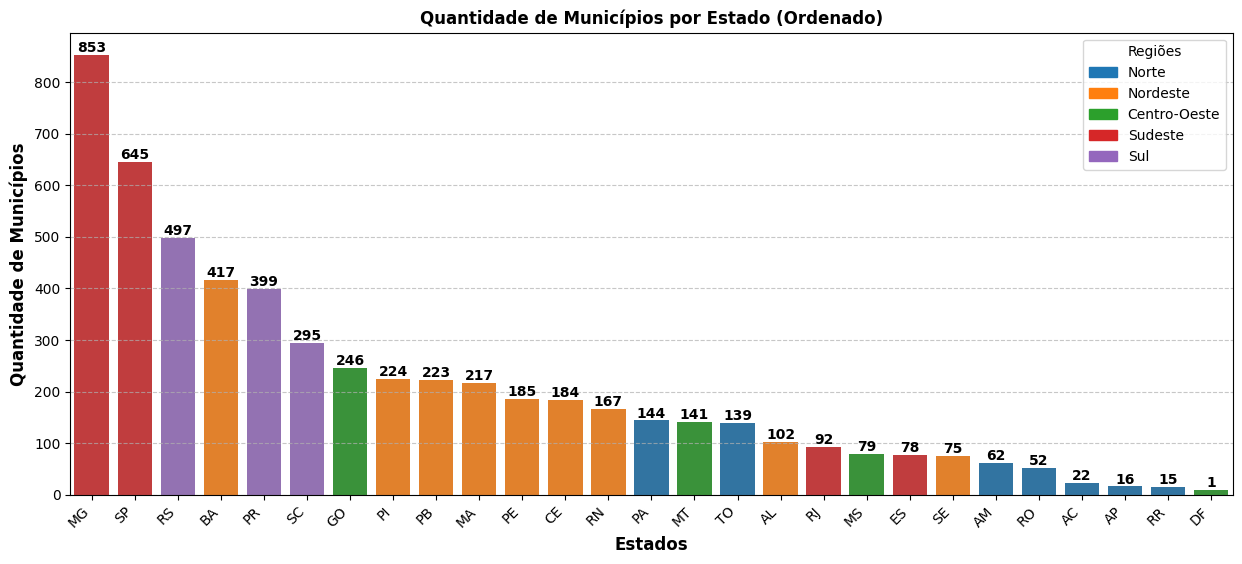

In [234]:
# Mapeamento de cada UF (estado) para sua respectiva região
regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AM': 'Norte', 'AP': 'Norte', 'BA': 'Nordeste',
    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
    'MA': 'Nordeste', 'MG': 'Sudeste', 'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste',
    'PA': 'Norte', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'PR': 'Sul',
    'RJ': 'Sudeste', 'RN': 'Nordeste', 'RO': 'Norte', 'RR': 'Norte', 'RS': 'Sul',
    'SC': 'Sul', 'SE': 'Nordeste', 'SP': 'Sudeste', 'TO': 'Norte'
}

# Paleta de cores para cada região
cores_regiao = {
    'Norte': '#1f77b4',        # Azul
    'Nordeste': '#ff7f0e',     # Laranja
    'Centro-Oeste': '#2ca02c', # Verde
    'Sudeste': '#d62728',      # Vermelho
    'Sul': '#9467bd'           # Roxo
}

# Criar uma cópia do DataFrame para exibição com valor mínimo visual
dados_plot = quantidade_por_estado.copy()
dados_plot['nome_municipio_plot'] = dados_plot['nome_municipio'].apply(lambda x: x if x > 10 else 10)

# Criar paleta de cores baseada na região de cada UF
palette = [cores_regiao[regiao[uf]] for uf in dados_plot['uf']]

# Criar o gráfico com `hue='uf'` e `legend=False`
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=dados_plot, x='uf', y='nome_municipio_plot', hue='uf', palette=palette, legend=False)

# Adicionar os valores reais acima de cada barra
for i, p in enumerate(ax.patches):
    valor_real = quantidade_por_estado.iloc[i]['nome_municipio']
    ax.annotate(f'{valor_real}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adicionar legenda manualmente
handles = [plt.Rectangle((0,0),1,1, color=cores_regiao[regiao]) for regiao in cores_regiao]
plt.legend(handles, cores_regiao.keys(), title="Regiões", loc="upper right")

# Configurações do gráfico
plt.title('Quantidade de Municípios por Estado (Ordenado)', fontsize=12, fontweight='bold')
plt.xlabel('Estados', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de Municípios', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Adicionar linhas horizontais na grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()
